#Assignment: Enhanced Dynamic Robot Movement Simulation
### Name : Maherun Nessa Isty
### ID : 2021-2-60-086
### CSE366 : Artificial Intelligence (AI)
### Sec: 3



#Introduction

Search algorithms play a crucial role in many areas of computer science and artificial intelligence, particularly in pathfinding and graph traversal tasks. This lab focuses on implementing four fundamental search algorithms:

Uninformed Search Strategies:

    Depth-First Search (DFS)
    Breadth-First Search (BFS)

Informed Search Strategies:

    Uniform Cost Search (UCS)
    A* Search

Students will apply these algorithms to a grid-based navigation problem, identifying the most efficient path from a start point to a goal point while avoiding obstacles.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from queue import PriorityQueue #A*
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []

    def empty(self):
        return len(self.elements) == 0

    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def get(self):
        return heapq.heappop(self.elements)[1]

In [2]:
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0, battery_level=100):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.battery_level = battery_level

    def __lt__(self, other):
        return self.path_cost < other.path_cost


#Environment Setup
Implement a environment class to model the navigation environment as a 2D grid. The grid should include obstacles, a start point (S), and a goal point (G). Implement Search Algorithms:

Implement the DFS and BFS algorithms to explore the grid. Implement the UCS and A* Search algorithms, utilizing cost functions and heuristics to find optimal paths.

In [3]:
class Environment:
    def __init__(self, grid, start, goal):
        self.grid = grid  # The grid layout where 1 represents an obstacle and 0 is free space.
        self.initial = start  # Starting position of the agent.
        self.goal = goal  # Goal position the agent aims to reach.
        self.states_requiring_charging = set()
        self.battery_consumption = 100*(10/100)  # Battery consumption per move in percentage.

    # Returns the possible actions from a given state.
    def actions(self, state):
        possible_actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
        x, y = state

        # Remove impossible actions based on grid boundaries and obstacles.
        if x == 0 or self.grid[x - 1][y] == 1:
            possible_actions.remove('UP')
        if x == len(self.grid) - 1 or self.grid[x + 1][y] == 1:
            possible_actions.remove('DOWN')
        if y == 0 or self.grid[x][y - 1] == 1:
            possible_actions.remove('LEFT')
        if y == len(self.grid[0]) - 1 or self.grid[x][y + 1] == 1:
            possible_actions.remove('RIGHT')

        return possible_actions

    # Returns the state resulting from taking a given action at a given state.
    def result(self, state, action):
        x, y = state
        if action == 'UP':
            return (x - 1, y)
        if action == 'DOWN':
            return (x + 1, y)
        if action == 'LEFT':
            return (x, y - 1)
        if action == 'RIGHT':
            return (x, y + 1)

    # Checks if the goal has been reached.
    def is_goal(self, state):
        return state == self.goal

    # Checks if the grid is valid, i.e. not completely blocked by obstacles and has valid start and goal positions.
    def is_valid(self):
        # Check if start and goal positions are free spaces
        if self.grid[self.initial[0]][self.initial[1]] == 1 or self.grid[self.goal[0]][self.goal[1]] == 1:
            return False

        # Check if there is at least one free space in each row and column
        for i in range(len(self.grid)):
            if 0 not in self.grid[i]:
                return False
        for j in range(len(self.grid[0])):
            if 0 not in self.grid[:, j]:
                return False

        # If all checks passed, return True
        return True


#Agent

**Agent using UCS Algorithm**

In [4]:

class Agent_ucs:
    def __init__(self, env):
        self.env = env

    def uniform_cost_search(self):
        # Check if the grid is valid before starting the search
        if not self.env.is_valid():
            return self.reconstruct_path(came_from, current_node.state), battery_levels
            #print("Invalid grid. No valid path possible.")
            #return [], {}

        frontier = PriorityQueue()  # Priority queue for UCS.
        initial_node = Node(self.env.initial, path_cost=0, battery_level=100)
        frontier.put(initial_node, 0)
        came_from = {self.env.initial: None}
        cost_so_far = {self.env.initial: 0}
        battery_levels = {self.env.initial: 100}

        while not frontier.empty():
            current_node = frontier.get()

            if self.env.is_goal(current_node.state):
                return self.reconstruct_path(came_from, current_node.state), battery_levels

            for action in self.env.actions(current_node.state):
                new_state = self.env.result(current_node.state, action)
                new_cost = cost_so_far[current_node.state] + 1  # Assuming uniform cost for simplicity; adjust if varying costs.
                new_battery_level = current_node.battery_level - self.env.battery_consumption  # Decrease battery level by the consumption per move

                # Check if the battery level is sufficient
                if new_battery_level <= 0:
                    # Recharge the battery to 100%
                    new_battery_level = 100
                    # Add the state to the set of states requiring charging
                    self.env.states_requiring_charging.add(new_state)

                if new_state not in cost_so_far or new_cost < cost_so_far[new_state]:
                    cost_so_far[new_state] = new_cost
                    priority = new_cost
                    new_node = Node(new_state, current_node, action, new_cost, new_battery_level)
                    frontier.put(new_node, priority)
                    came_from[new_state] = current_node.state
                    battery_levels[new_state] = new_battery_level

        # If no valid path found, return empty lists
        print("No valid path found.")
        return [], {}

    def reconstruct_path(self, came_from, current):
        path = []
        while current in came_from:
            path.append(current)
            current = came_from[current]
        path.append(self.env.initial)
        path.reverse()
        return path

**Agent using A* Algorithm**

In [5]:
def heuristic(state, goal):
    x1, y1 = state
    x2, y2 = goal
    return abs(x1 - x2) + abs(y1 - y2)

In [6]:
from queue import PriorityQueue
class Agent:
    def __init__(self, env):
        self.env = env

    def a_star_search(self):
        start_node = Node(self.env.initial, path_cost=0, battery_level=100)
        frontier = PriorityQueue()
        frontier.put(start_node)
        came_from = {self.env.initial: None}
        cost_so_far = {self.env.initial: 0}
        battery_levels = {(pos[0], pos[1]): 100 for pos in np.ndindex(self.env.grid.shape)}
# Initialize battery levels for all states

        while not frontier.empty():
            current_node = frontier.get()

            if self.env.is_goal(current_node.state):
                return self.reconstruct_path(came_from, current_node.state), battery_levels

            for action in self.env.actions(current_node.state):
                new_state = self.env.result(current_node.state, action)
                new_cost = cost_so_far[current_node.state] + 1
                new_battery_level = current_node.battery_level - self.env.battery_consumption

                # Check if the battery level is sufficient
                if new_battery_level <= 0:
                    # Recharge the battery to 100%
                    new_battery_level = 100

                    # Add the state to the set of states requiring charging
                    self.env.states_requiring_charging.add(new_state)

                if new_state not in cost_so_far or new_cost < cost_so_far[new_state]:
                    cost_so_far[new_state] = new_cost
                    priority = new_cost + heuristic(new_state, self.env.goal)
                    new_node = Node(new_state, current_node, action, new_cost, new_battery_level)
                    frontier.put(new_node)
                    came_from[new_state] = current_node.state
                    battery_levels[new_state] = new_battery_level  # Update battery level

        return [], {}

    def reconstruct_path(self, came_from, current):
        path = []
        while current in came_from:
            path.append(current)
            current = came_from[current]
        path.append(self.env.initial)
        path.reverse()
        return path


#Visualization
Use a visualization library (e.g., matplotlib) to visually represent the grid, the obstacles, and the paths found by each algorithm.

In [16]:
def visualize_grid_and_path(grid, path, battery_levels):
    if not path:
        print("No valid path found.")
        return

    grid_array = np.array(grid)  # Convert grid to numpy array for easy plotting.
    fig, ax = plt.subplots()
    ax.imshow(grid_array, cmap='Greys', alpha=0.3)  # Grid background.

    start = path[0]
    goal = path[-1]
    ax.plot(start[1], start[0], 'bs', markersize=12)  # Start position in blue.
    ax.plot(goal[1], goal[0], 'gs', markersize=12)  # Goal position in green.

    xs, ys = zip(*path)  # Extract X and Y coordinates of the path.
    ax.plot(ys, xs, 'r-', linewidth=3)  # Plot the path in red.

    # Plot battery levels
    for pos in path:  # Only plot the battery level for the states in the path
        battery_level = battery_levels.get(pos, 100)  # Get battery level, default to 100 if not available
        ax.text(pos[1], pos[0], f'{battery_level}%', color='blue', ha='center', va='center', fontsize=8)
        # If the state requires charging, mark it with a star
        if pos in environment.states_requiring_charging:
          if(battery_level==100):
            ax.plot(pos[1], pos[0], 'y*', markersize=15)

    ax.set_xticks(np.arange(-.5, len(grid[0]), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(grid), 1), minor=True)
    ax.grid(which="minor", color="b", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", size=0)
    ax.tick_params(which="major", bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()


#Simulation

**using UCS Algorithm**

Solution Path: [(0, 0), (0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (6, 6), (6, 7), (7, 7), (7, 8), (7, 9), (8, 9), (9, 9)]


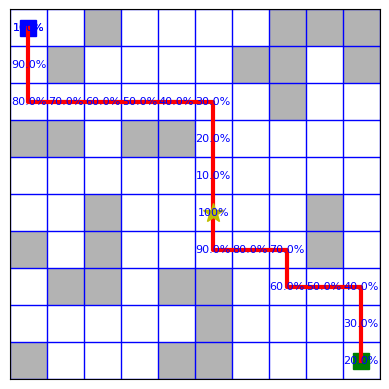

In [33]:
 # Generate a Random Grid Function
def generate_random_grid(size, obstacle_probability):
    return np.random.choice([0, 1], size=(size, size), p=[1-obstacle_probability, obstacle_probability])

# Define the size of the grid and the probability of an obstacle in each cell
grid_size = 10
obstacle_probability = 0.2  # 20% chance of being an obstacle

# Generate a random grid
grid = generate_random_grid(grid_size, obstacle_probability)

# Define start and goal positions
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# Ensure start and goal are not obstacles
grid[start] = 0
grid[goal] = 0

# Create the environment and agent
environment = Environment(grid, start, goal)
agent_ucs = Agent_ucs(environment)

# Solve the problem with Uniform Cost Search
solution_path, battery_levels = agent_ucs.uniform_cost_search()
print("Solution Path:", solution_path)

# Visualize the solution
visualize_grid_and_path(grid, solution_path, battery_levels)

**using A* Algorithm**

Solution Path: [(0, 0), (0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4), (5, 4), (5, 5), (6, 5), (7, 5), (7, 6), (7, 7), (8, 7), (8, 8), (8, 9), (9, 9)]


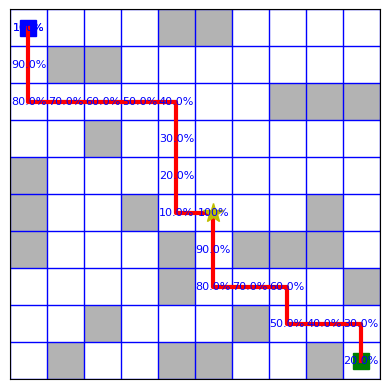

In [18]:
# Generate a Random Grid Function
def generate_random_grid(size, obstacle_probability):
    return np.random.choice([0, 1], size=(size, size), p=[1-obstacle_probability, obstacle_probability])

# Define the size of the grid and the probability of an obstacle in each cell
grid_size = 10
obstacle_probability = 0.2  # 20% chance of being an obstacle

# Generate a random grid
grid = generate_random_grid(grid_size, obstacle_probability)

# Define start and goal positions
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# Ensure start and goal are not obstacles
grid[start] = 0
grid[goal] = 0

# Create the environment and agent
environment = Environment(grid, start, goal)
agent = Agent(environment)

# Solve the problem with the A* algorithm
solution_path, battery_levels = agent.a_star_search()
print("Solution Path:", solution_path)

# Visualize the solution
visualize_grid_and_path(grid, solution_path, battery_levels)

#UCS and A* search algorithms


Solution Path: [(5, 9), (5, 9), (5, 8), (5, 7), (5, 6), (5, 5), (5, 4), (4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (0, 3)]


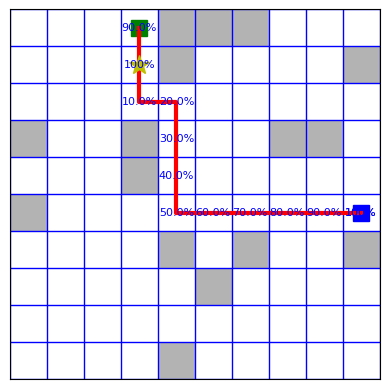

Solution Path: [(5, 9), (5, 9), (5, 8), (5, 7), (5, 6), (5, 5), (5, 4), (4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (0, 3)]


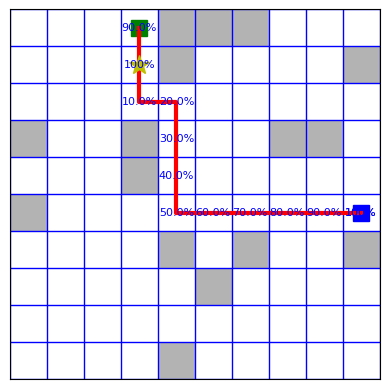

In [32]:
def generate_random_grid(size, obstacle_probability):
    return np.random.choice([0, 1], size=(size, size), p=[1-obstacle_probability, obstacle_probability])

# Define the size of the grid and the probability of an obstacle in each cell
grid_size = 10
obstacle_probability = 0.2  # 20% chance of being an obstacle

# Generate a random grid
grid = generate_random_grid(grid_size, obstacle_probability)

# Define start and goal positions
start = (np.random.randint(grid_size), np.random.randint(grid_size))
goal = (np.random.randint(grid_size), np.random.randint(grid_size))

# Ensure start and goal are not obstacles
grid[start] = 0
grid[goal] = 0

# Create the environment and agent
environment = Environment(grid, start, goal)
agent_ucs = Agent_ucs(environment)

# Solve the problem with Uniform Cost Search
solution_path, battery_levels = agent_ucs.uniform_cost_search()
print("Solution Path:", solution_path)

# Visualize the solution
visualize_grid_and_path(grid, solution_path, battery_levels)

environment = Environment(grid, start, goal)
agent = Agent(environment)

# Solve the problem with the A* algorithm
solution_path, battery_levels = agent.a_star_search()
print("Solution Path:", solution_path)

# Visualize the solution
visualize_grid_and_path(grid, solution_path, battery_levels)

#Comparing the execution time

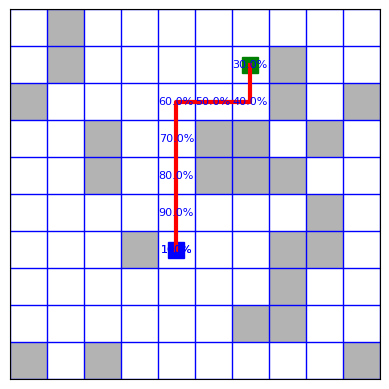

Execution time for UCS: 0.0011332035064697266 seconds


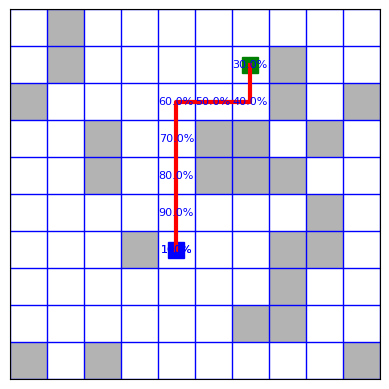

Execution time for A*: 0.000732421875 seconds


In [41]:
import time  # Import the time module for measuring execution time

# Define the generate_random_grid, Environment, Agent_ucs, visualize_grid_and_path functions here

# Define the generate_random_grid function
def generate_random_grid(size, obstacle_probability):
    return np.random.choice([0, 1], size=(size, size), p=[1-obstacle_probability, obstacle_probability])

# Define the size of the grid and the probability of an obstacle in each cell
grid_size = 10
obstacle_probability = 0.2  # 20% chance of being an obstacle

# Generate a random grid
grid = generate_random_grid(grid_size, obstacle_probability)

# Define start and goal positions
start = (np.random.randint(grid_size), np.random.randint(grid_size))
goal = (np.random.randint(grid_size), np.random.randint(grid_size))

# Ensure start and goal are not obstacles
grid[start] = 0
grid[goal] = 0

# Create the environment and agent for UCS
environment = Environment(grid, start, goal)
agent_ucs = Agent_ucs(environment)

# Measure the execution time for UCS
start_time_ucs = time.time()
solution_path_ucs, battery_levels_ucs = agent_ucs.uniform_cost_search()
end_time_ucs = time.time()
execution_time_ucs = end_time_ucs - start_time_ucs

# Visualize the solution for UCS
visualize_grid_and_path(grid, solution_path_ucs, battery_levels_ucs)
print("Execution time for UCS:", execution_time_ucs, "seconds")

# Create the environment and agent for A*
environment = Environment(grid, start, goal)
agent = Agent(environment)

# Measure the execution time for A*
start_time_astar = time.time()
solution_path_astar, battery_levels_astar = agent.a_star_search()
end_time_astar = time.time()
execution_time_astar = end_time_astar - start_time_astar

# Visualize the solution for A*
visualize_grid_and_path(grid, solution_path_astar, battery_levels_astar)
print("Execution time for A*:", execution_time_astar, "seconds")